In [31]:
import pandas as pd
import numpy as np

# missing value viz
import missingno as msno

# datetime module
import datetime

## All Dog Descriptions

In [2]:
df = pd.read_csv('data/descriptions.csv')

In [3]:
df.head()

,index,id,org_id,url,type.x,species,breed_primary,breed_secondary,breed_mixed,breed_unknown,...,status,posted,contact_city,contact_state,contact_zip,contact_country,stateQ,accessed,type.y,description
0,0,46042150,NV163,https://www.petfinder.com/dog/harley-46042150/...,Dog,Dog,American Staffordshire Terrier,Mixed Breed,True,False,...,adoptable,2019-09-20T16:37:59+0000,Las Vegas,NV,89147,US,89009,2019-09-20,Dog,Harley is not sure how he wound up at shelter ...
1,1,46042002,NV163,https://www.petfinder.com/dog/biggie-46042002/...,Dog,Dog,Pit Bull Terrier,Mixed Breed,True,False,...,adoptable,2019-09-20T16:24:57+0000,Las Vegas,NV,89147,US,89009,2019-09-20,Dog,6 year old Biggie has lost his home and really...
2,2,46040898,NV99,https://www.petfinder.com/dog/ziggy-46040898/n...,Dog,Dog,Shepherd,NaN,False,False,...,adoptable,2019-09-20T14:10:11+0000,Mesquite,NV,89027,US,89009,2019-09-20,Dog,Approx 2 years old.\n Did I catch your eye? I ...
3,3,46039877,NV202,https://www.petfinder.com/dog/gypsy-46039877/n...,Dog,Dog,German Shepherd Dog,NaN,False,False,...,adoptable,2019-09-20T10:08:22+0000,Pahrump,NV,89048,US,89009,2019-09-20,Dog,NaN
4,4,46039306,NV184,https://www.petfinder.com/dog/theo-46039306/nv...,Dog,Dog,Dachshund,NaN,False,False,...,adoptable,2019-09-20T06:48:30+0000,Henderson,NV,89052,US,89009,2019-09-20,Dog,Theo is a friendly dachshund mix who gets alon...


In [4]:
df.shape

(58180, 36)

In [5]:
df.isnull().sum()

index                  0
id                     0
org_id                 0
url                    0
type.x                 0
species                0
breed_primary          0
breed_secondary    37359
breed_mixed            0
breed_unknown          0
color_primary      32046
color_secondary    46121
color_tertiary     56963
age                    0
sex                    0
size                   0
coat               30995
fixed                  0
house_trained          0
declawed           58180
special_needs          0
shots_current          0
env_children       30153
env_dogs           23511
env_cats           38828
name                   0
status                 0
posted                 0
contact_city           0
contact_state          0
contact_zip           12
contact_country        0
stateQ                 0
accessed              33
type.y               640
description         8705
dtype: int64

## Missing Values

<AxesSubplot:>

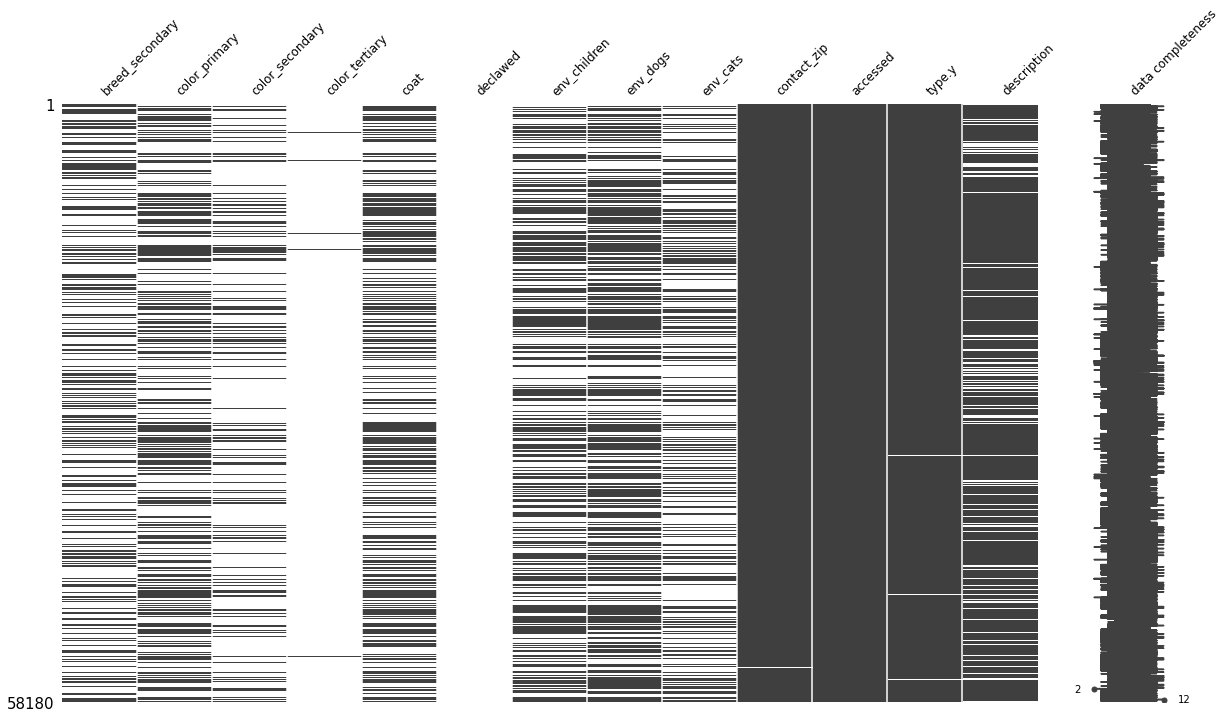

In [6]:
# Visualizing missing values - matrix
missingValueColumns = df.columns[df.isnull().any()].tolist()
msno.matrix(df[missingValueColumns], width_ratios = (10, 1), \
           figsize=(20,11), fontsize = 12, sparkline=True, labels = True)

<AxesSubplot:>

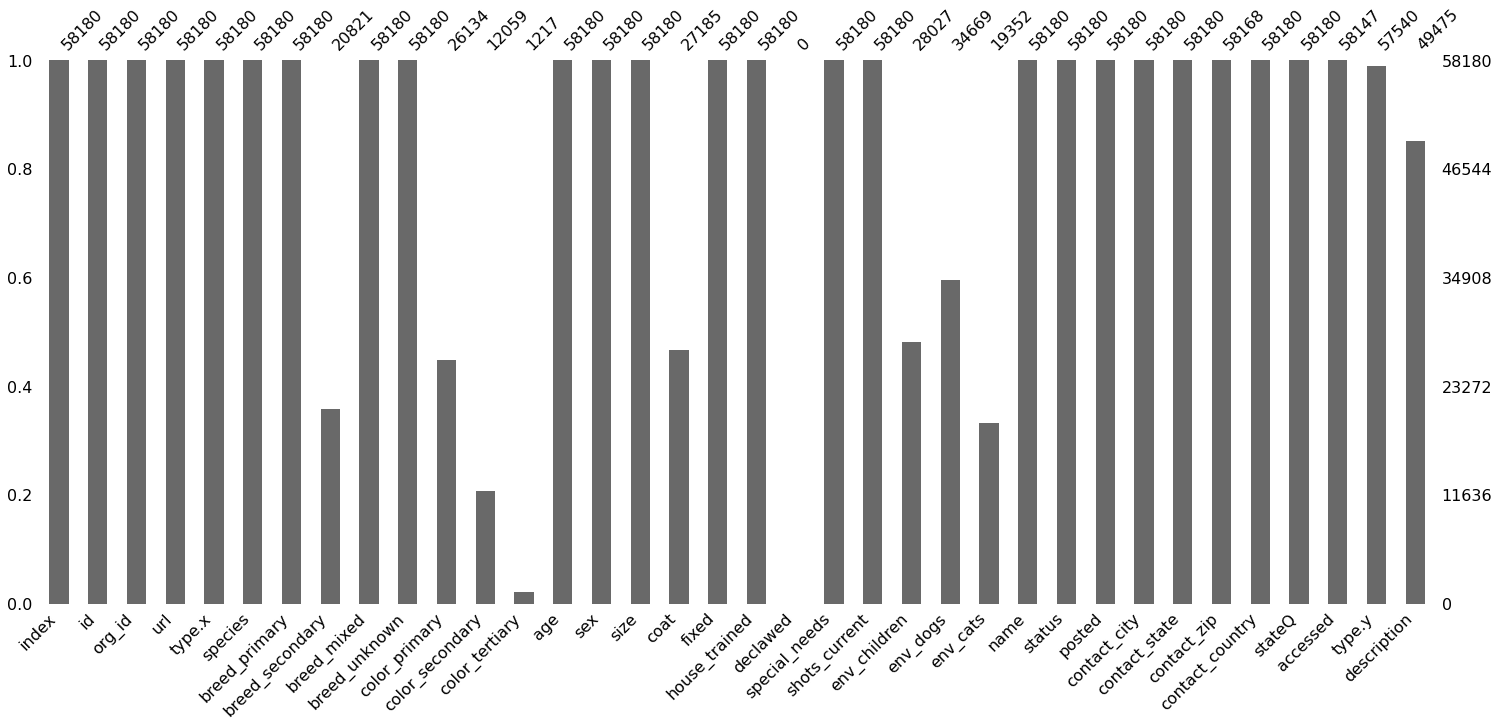

In [7]:
# bar plot
msno.bar(df)

In [8]:
# columns with more than 50% missing values
(df.isnull().sum()/df.shape[0])>0.5

index              False
id                 False
org_id             False
url                False
type.x             False
species            False
breed_primary      False
breed_secondary     True
breed_mixed        False
breed_unknown      False
color_primary       True
color_secondary     True
color_tertiary      True
age                False
sex                False
size               False
coat                True
fixed              False
house_trained      False
declawed            True
special_needs      False
shots_current      False
env_children        True
env_dogs           False
env_cats            True
name               False
status             False
posted             False
contact_city       False
contact_state      False
contact_zip        False
contact_country    False
stateQ             False
accessed           False
type.y             False
description        False
dtype: bool

In [9]:
# column with more than 50% missing values' names
cols_to_drop = df.columns[((df.isnull().sum()/df.shape[0])>0.5)]

In [10]:
cols_to_drop

Index(['breed_secondary', 'color_primary', 'color_secondary', 'color_tertiary',
       'coat', 'declawed', 'env_children', 'env_cats'],
      dtype='object')

In [11]:
# convert columns to a list
cols_to_drop = cols_to_drop.tolist()

In [12]:
# drop columns with more than 50% missing values
df.drop(columns = cols_to_drop, inplace = True)

In [13]:
# check df after dropping cols
df.head()

,index,id,org_id,url,type.x,species,breed_primary,breed_mixed,breed_unknown,age,...,status,posted,contact_city,contact_state,contact_zip,contact_country,stateQ,accessed,type.y,description
0,0,46042150,NV163,https://www.petfinder.com/dog/harley-46042150/...,Dog,Dog,American Staffordshire Terrier,True,False,Senior,...,adoptable,2019-09-20T16:37:59+0000,Las Vegas,NV,89147,US,89009,2019-09-20,Dog,Harley is not sure how he wound up at shelter ...
1,1,46042002,NV163,https://www.petfinder.com/dog/biggie-46042002/...,Dog,Dog,Pit Bull Terrier,True,False,Adult,...,adoptable,2019-09-20T16:24:57+0000,Las Vegas,NV,89147,US,89009,2019-09-20,Dog,6 year old Biggie has lost his home and really...
2,2,46040898,NV99,https://www.petfinder.com/dog/ziggy-46040898/n...,Dog,Dog,Shepherd,False,False,Adult,...,adoptable,2019-09-20T14:10:11+0000,Mesquite,NV,89027,US,89009,2019-09-20,Dog,Approx 2 years old.\n Did I catch your eye? I ...
3,3,46039877,NV202,https://www.petfinder.com/dog/gypsy-46039877/n...,Dog,Dog,German Shepherd Dog,False,False,Baby,...,adoptable,2019-09-20T10:08:22+0000,Pahrump,NV,89048,US,89009,2019-09-20,Dog,NaN
4,4,46039306,NV184,https://www.petfinder.com/dog/theo-46039306/nv...,Dog,Dog,Dachshund,False,False,Young,...,adoptable,2019-09-20T06:48:30+0000,Henderson,NV,89052,US,89009,2019-09-20,Dog,Theo is a friendly dachshund mix who gets alon...


## Drop Unnecessary Columns

In [14]:
df.columns

Index(['index', 'id', 'org_id', 'url', 'type.x', 'species', 'breed_primary',
       'breed_mixed', 'breed_unknown', 'age', 'sex', 'size', 'fixed',
       'house_trained', 'special_needs', 'shots_current', 'env_dogs', 'name',
       'status', 'posted', 'contact_city', 'contact_state', 'contact_zip',
       'contact_country', 'stateQ', 'accessed', 'type.y', 'description'],
      dtype='object')

In [15]:
df['type.y'].value_counts()

Dog    57540
Name: type.y, dtype: int64

In [16]:
df['status'].value_counts()

adoptable                   58147
2017-06-16T18:44:33+0000        1
2019-07-25T19:53:21+0000        1
2015-06-29T23:58:09+0000        1
2015-02-07T13:06:43+0000        1
2019-09-20T01:50:51+0000        1
2019-02-18T12:02:48+0000        1
2013-10-10T13:57:39+0000        1
2015-12-25T12:28:30+0000        1
2018-04-05T05:18:31+0000        1
2019-09-13T06:08:17+0000        1
2019-09-10T16:43:35+0000        1
2019-09-09T17:05:17+0000        1
2019-08-24T16:32:31+0000        1
2019-07-31T16:21:07+0000        1
2019-07-29T21:50:16+0000        1
2019-09-08T18:21:21+0000        1
2018-04-18T13:45:46+0000        1
2019-04-25T01:56:52+0000        1
2019-09-13T19:39:28+0000        1
2019-09-07T04:09:12+0000        1
2017-10-07T23:48:20+0000        1
2018-07-05T00:55:08+0000        1
2015-09-07T12:57:27+0000        1
2016-12-15T13:33:43+0000        1
2019-05-14T21:09:27+0000        1
2019-08-10T16:00:35+0000        1
2019-07-11T14:16:38+0000        1
2019-07-11T20:34:42+0000        1
2019-07-18T14:

In [17]:
df['stateQ'].value_counts()

CT       6725
DC       4665
GA       3439
NC       3085
FL       2659
         ... 
89408       8
89801       5
89027       2
RI          1
89014       1
Name: stateQ, Length: 62, dtype: int64

In [18]:
df['posted'].value_counts()

2019-08-31T10:01:48+0000    121
2019-08-31T10:46:47+0000     83
2019-07-31T17:35:08+0000     68
2019-07-31T17:27:28+0000     63
2019-08-31T10:40:37+0000     61
                           ... 
2019-09-18T14:06:33+0000      1
2019-09-18T14:03:35+0000      1
2019-09-18T13:53:33+0000      1
2019-09-18T13:39:23+0000      1
2018-09-03T20:42:24+0000      1
Name: posted, Length: 48373, dtype: int64

In [19]:
# drop columns
df.drop(columns = ['index', 'url', 'type.x', 'species', 'type.y', 'status'], inplace = True)

## Data Types

In [20]:
df.dtypes

id                  int64
org_id             object
breed_primary      object
breed_mixed          bool
breed_unknown        bool
age                object
sex                object
size               object
fixed                bool
house_trained        bool
special_needs        bool
shots_current        bool
env_dogs           object
name               object
posted             object
contact_city       object
contact_state      object
contact_zip        object
contact_country    object
stateQ             object
accessed           object
description        object
dtype: object

In [21]:
df.head()

,id,org_id,breed_primary,breed_mixed,breed_unknown,age,sex,size,fixed,house_trained,...,env_dogs,name,posted,contact_city,contact_state,contact_zip,contact_country,stateQ,accessed,description
0,46042150,NV163,American Staffordshire Terrier,True,False,Senior,Male,Medium,True,True,...,NaN,HARLEY,2019-09-20T16:37:59+0000,Las Vegas,NV,89147,US,89009,2019-09-20,Harley is not sure how he wound up at shelter ...
1,46042002,NV163,Pit Bull Terrier,True,False,Adult,Male,Large,True,True,...,NaN,BIGGIE,2019-09-20T16:24:57+0000,Las Vegas,NV,89147,US,89009,2019-09-20,6 year old Biggie has lost his home and really...
2,46040898,NV99,Shepherd,False,False,Adult,Male,Large,True,False,...,NaN,Ziggy,2019-09-20T14:10:11+0000,Mesquite,NV,89027,US,89009,2019-09-20,Approx 2 years old.\n Did I catch your eye? I ...
3,46039877,NV202,German Shepherd Dog,False,False,Baby,Female,Large,False,False,...,NaN,Gypsy,2019-09-20T10:08:22+0000,Pahrump,NV,89048,US,89009,2019-09-20,NaN
4,46039306,NV184,Dachshund,False,False,Young,Male,Small,True,False,...,True,Theo,2019-09-20T06:48:30+0000,Henderson,NV,89052,US,89009,2019-09-20,Theo is a friendly dachshund mix who gets alon...


**`posted`**

In [22]:
df.posted = df.posted.str.slice(0,19)

In [23]:
df.posted

0        2019-09-20T16:37:59
1        2019-09-20T16:24:57
2        2019-09-20T14:10:11
3        2019-09-20T10:08:22
4        2019-09-20T06:48:30
                ...         
58175    2019-05-03T14:23:49
58176    2019-04-13T16:20:24
58177    2018-09-27T04:18:56
58178    2018-09-12T05:03:38
58179    2018-09-03T20:42:24
Name: posted, Length: 58180, dtype: object

In [26]:
# extract date from `posted`
df['post_date'] = df.posted.str.slice(0,10)

In [25]:
# check date
df['post_date']

0        2019-09-20
1        2019-09-20
2        2019-09-20
3        2019-09-20
4        2019-09-20
            ...    
58175    2019-05-03
58176    2019-04-13
58177    2018-09-27
58178    2018-09-12
58179    2018-09-03
Name: post_date, Length: 58180, dtype: object

**Convert to date and time**

In [64]:
# filter rows start with letter
indexname = df[df.post_date.str.isalpha()].index
# drop rows with nondatetime value
df.drop(indexname, inplace=True)

In [81]:
# filter rows start with letter
indexname = df[df.post_date=='Silver Spr'].index
# drop rows with nondatetime value
df.drop(indexname, inplace=True)

In [82]:
df['post_date'] = pd.to_datetime(df['post_date'])

ParserError: Unknown string format: lake charl

In [29]:
# extract date from `posted`
df['post_time'] = df.posted.str.slice(11,19)

In [30]:
df['post_time']

0        16:37:59
1        16:24:57
2        14:10:11
3        10:08:22
4        06:48:30
           ...   
58175    14:23:49
58176    16:20:24
58177    04:18:56
58178    05:03:38
58179    20:42:24
Name: post_time, Length: 58180, dtype: object

## Wrangle Function

In [ ]:
def prep_data(df):
    # column with more than 50% missing values' names
    cols_to_drop = df.columns[((df.isnull().sum()/df.shape[0])>0.5)]
    # convert columns to a list
    cols_to_drop = cols_to_drop.tolist()
    # drop columns with more than 50% missing values
    df.drop(columns = cols_to_drop, inplace = True)
    # drop columns
    df.drop(columns = ['index', 'url', 'type.x', 'species', 'type.y', 'status'], inplace = True)